## 1. 이미지 표현

## 2. OpenCV와 이미지 읽기

### 2.1 OpenCV

In [1]:
import cv2
print(cv2.__version__)

4.5.5


### 2.2 cv2.imread()로 이미지 불러오기

In [2]:
img = cv2.imread('images/lena.jpg', cv2.IMREAD_COLOR) # color가 기본값
print(img.shape) # opencv는 channel last
print(type(img))

(512, 512, 3)
<class 'numpy.ndarray'>


In [3]:
gray_img = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
print(gray_img.shape)

(512, 512)


### 2.3 cv2.imshow()로 이미지 출력하기

In [4]:
cv2.imshow('Lena', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
fname = 'images/lena.jpg'
color = cv2.imread(fname, cv2.IMREAD_COLOR)
grayscale = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
unchanged = cv2.imread(fname, cv2.IMREAD_UNCHANGED)

cv2.imshow('Color', color)
cv2.imshow('Grayscale', grayscale)
cv2.imshow('Unchanged', unchanged)
cv2.waitKey()
cv2.destroyAllWindows()

### 2.4 cv2.imwrite()로 이미지 저장하기

In [19]:
gray_img = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('images/lena_gray.png', gray_img)

True

### 2.5 Matplotlib 사용해서 이미지 출력하기

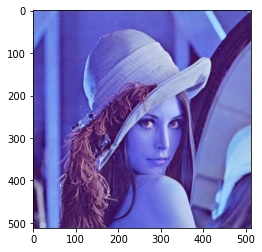

In [6]:
import matplotlib.pyplot as plt

img = cv2.imread('images/lena.jpg', cv2.IMREAD_COLOR)

plt.imshow(img)
plt.show()

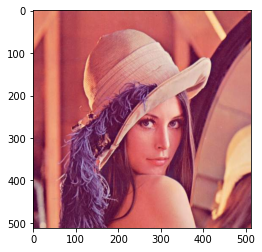

In [7]:
b, g, r = cv2.split(img)
img2 = cv2.merge([r, g, b])

plt.imshow(img2)
plt.show()

## 3. 디지털 화상과 컬러

### 3.4 색상 공간 변환

In [8]:
# 변환 방법
flags = [flag for flag in dir(cv2) if flag.startswith('COLOR_')]
len(flags)

346

In [9]:
# 컬러 이미지 그레이 스케일로 변환
lena_img = cv2.imread('images/lena.jpg')
b, g, r = lena_img[0][0]

print('컬러 화소', lena_img[0][0])
print('YPrPb', 0.114*b + 0.587*g + 0.299*r)
print('YCrCb', 0.0722*b + 0.7152*g + 0.2116*r)

lena_gray = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
print('그레이스케일 화소', lena_gray[0][0])

컬러 화소 [127 136 226]
YPrPb 161.884
YCrCb 154.2582
그레이스케일 화소 162


## 4. 동영상 처리하기

### 4.1 동영상 읽기

In [10]:
import cv2

cap = cv2.VideoCapture('images/Puppies-HD.mp4')
if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('Movie', img)
            if cv2.waitKey(delay) & 0xFF == 27:
                print('ESC Key Pressed')
                break
            else:
                print(ret, img)
                break
else:
    print('File not opened')

cap.release()
cv2.destroyAllWindows()

True [[[ 16  73  51]
  [ 22  79  57]
  [ 21  78  56]
  ...
  [ 10 106  70]
  [ 12 108  72]
  [  6 102  66]]

 [[ 22  79  57]
  [ 28  85  63]
  [ 27  84  62]
  ...
  [ 16 112  76]
  [ 18 114  78]
  [ 12 108  72]]

 [[ 20  77  55]
  [ 26  83  61]
  [ 24  81  59]
  ...
  [ 14 110  74]
  [ 15 111  75]
  [ 10 106  70]]

 ...

 [[ 68 145 126]
  [ 77 154 135]
  [ 62 148 114]
  ...
  [ 83 160 132]
  [ 88 163 135]
  [ 74 149 121]]

 [[ 70 147 128]
  [ 80 157 138]
  [ 65 151 117]
  ...
  [ 86 162 137]
  [ 94 165 141]
  [ 79 150 126]]

 [[ 60 137 118]
  [ 68 145 126]
  [ 55 141 107]
  ...
  [ 75 151 126]
  [ 82 153 129]
  [ 68 139 115]]]


### 4.2 카메라 영상 읽기

In [12]:
import cv2

cap = cv2.VideoCapture(0)
if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imshow('Camera', img_gray)
            if cv2.waitKey(delay) & 0xFF == 27:
                print('ESC Key pressed')
                break
        else:
            print(ret, img)
            break
else:
    print('Camera not opened')

cap.release()
cv2.destroyAllWindows()

ESC Key pressed


### 4.3 동영상 속성

In [14]:
import cv2

cap = cv2.VideoCapture(0)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

print(cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('Camera', img)
            if cv2.waitKey(delay) & 0xFF == 27:
                print('ESC Key pressed')
                break
        else:
            print(ret, img)
            break
else:
    print('Camera not opened')

cap.release()
cv2.destroyAllWindows()

640.0 480.0
320.0 240.0
ESC Key pressed


### 4.4 동영상 프레임 저장하기

In [17]:
# 윈도우 마우스로 클릭 시 화면 파일 캡처 저장
import cv2
import numpy as np
from datetime import datetime

def mouseHandler(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(event, x, y)
        print(datetime.today())
        filename = 'images/' + str(datetime.today().microsecond) + '.jpg'
        cv2.imwrite(filename, img)

cv2.namedWindow('Camera')
cv2.setMouseCallback('Camera', mouseHandler)

cap = cv2.VideoCapture(0)
if cap.isOpened():
    delay = int(1000 / cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imshow('Camera', img_gray)
            if cv2.waitKey(delay) & 0xFF == 27:
                print('ESC Key Pressed')
                break
        else:
            print(ret, img)
            break
else:
    print('Camera not opened')

cap.release()
cv2.destroyAllWindows()

1 263 165
2022-01-19 12:37:59.323169
1 326 201
2022-01-19 12:38:01.601983
ESC Key Pressed


### 4.5 비디오 저장하기

In [20]:
import cv2

cap = cv2.VideoCapture(0)
if cap.isOpened():
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height))
    fps = cap.get(cv2.CAP_PROP_FPS)
    out = cv2.VideoWriter("images/video.mp4", fourcc, fps, size)

    delay = int(1000/cap.get(cv2.CAP_PROP_FPS))
    while True:
        ret, img = cap.read()
        if ret:
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            cv2.imshow("Puppy", gray)
            out.write(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR))
            if cv2.waitKey(delay) & 0xFF == 27:
                print("윈도우 종료")
                break
        else:
            print(ret, img)
            break
else:
    print("비디오 안열림")

out.release()
cap.release()
cv2.destroyAllWindows()

윈도우 종료


## 5. 이벤트 처리하기

### 5.1 마우스 이벤트

In [24]:
def mouseHandler(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        if flags & cv2.EVENT_FLAG_CTRLKEY:
            cv2.rectangle(img, (x, y), (x+20, y+20), (0, 0, 255), -1)
        else:
            cv2.rectangle(img, (x, y), (x+20, y+20), (0, 0, 255), 2)
    
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x, y), 10, (255, 0, 0), 2)

    elif event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x, y), 10, (255, 0, 0), -1)

img = np.full((512, 512, 3), 255, dtype=np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', mouseHandler)

while(1):
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

### 5.2 키보드 이벤트

In [23]:
import cv2
import numpy as np

image = np.full((100, 100, 3), 255, np.uint8)

while(1):
    cv2.imshow('Key test', image)
    key = cv2.waitKey()
    print(f'Code: {key}, Char: {chr(key)}')
    if key & 0xFF == 27:
        break

cv2.destroyAllWindows()

Code: 32, Char:  
Code: 97, Char: a
Code: 115, Char: s
Code: 100, Char: d
Code: 102, Char: f
Code: 49, Char: 1
Code: 50, Char: 2
Code: 13, Char: 
Code: 92, Char: \
Code: 27, Char: 


### 5.3 트랙 바 사용하기

In [25]:
import cv2
import numpy as np

img = np.zeros((200, 500, 3), np.uint8)
cv2.namedWindow('image')

def set_background(x):
    global img
    r = cv2.getTrackbarPos('Red', 'image')
    g = cv2.getTrackbarPos('Green', 'image')
    b = cv2.getTrackbarPos('Blue', 'image')
    s = cv2.getTrackbarPos('0 or 1', 'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]

cv2.createTrackbar('Red', 'image', 0, 255, set_background)
cv2.createTrackbar('Green', 'image', 0, 255, set_background)
cv2.createTrackbar('Blue', 'image', 0, 255, set_background)
cv2.createTrackbar('0 or 1', 'image', 0, 1, set_background)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()